In [1]:
from biocrnpyler import *
try:
    #dnaplotlib is a cool library for plotting DNAs.
    #please use my fork located at https://github.com/dr3y/dnaplotlib
    #to install it type: pip install git+git://github.com/dr3y/dnaplotlib.git@master
    import dnaplotlib as dpl
    %matplotlib inline
    dpl_enabled = True
except (ModuleNotFoundError,ImportError) as e:
    dpl_enabled = False
print("imports done!")

def plotNetwork(inCRN,use_pretty_print=True,colordict = None,iterations=2000,rseed=30,posscale=1,export=False):
    try:
        from bokeh.models import (Plot , Range1d)

        import bokeh.plotting
        import bokeh.io
        bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
        if(colordict is None):
            colordict={"complex":"cyan","protein":"green",
                        "GFP":"lightgreen",
                        "RFP":"red",
                        "ribosome":"blue",
                        "dna":"white","rna":"orange",
                        "ligand":"pink","phosphate":"yellow","nothing":"purple"}
        layout_str = "force"
        DG, DGspec, DGrxn = generate_networkx_graph(inCRN,use_pretty_print=use_pretty_print,colordict=colordict) #this creates the networkx objects
        plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
        if(export):
            plot.output_backend = "svg"
        graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=posscale,iterations=iterations,rseed=rseed) #now you draw the network on the plot. Layout "force" is 
        bokeh.io.show(plot) #if you don't type this the plot won't show
        if(export):
            bokeh.io.export_svgs(plot,filename=inCRN.name+".svg")
            
    except ModuleNotFoundError:
        return None




ptet = RegulatedPromoter("ptet",["tetr"],leak=True) #this is a repressible promoter
pconst = Promoter("pconst") #constitutive promoter
utr1 = RBS("UTR1") #regular RBS
gfp = CDS("GFP","GFP")
rfp = CDS("RFP","RFP")
cfp = CDS("CFP") #cfp
t16 = Terminator("t16") #a terminator stops transcription
attB = IntegraseSite("attB","attB",integrase="Bxb1")
attP = IntegraseSite("attP","attP",integrase="Bxb1")
t16.attributes = ["no_inter"]


#now that the parts are defined, we can put together our construct.
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

imports done!


6
0
0
rendered 2 constructs
d:\documents\github\biocrnpyler\biocrnpyler\plotting.py:500: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.0001)


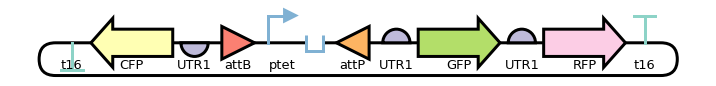

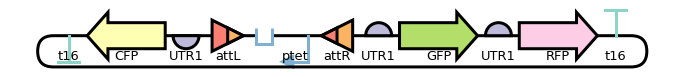

done
dict_keys([(attP_Bxb1_5_r, False)])
dict_keys([(attB_Bxb1_3_f, False)])
dict_keys([])
dict_keys([])


In [2]:
#Another complex DNA_construct example, where both DNA and RNA can be bound combinatorially
ptet.color="forestgreen"
utr1.color = "tan"
t16.color="black"
gfp.color="green"
rfp.color="red"
cfp.color = "blue"
bxb1 = Integrase_Enumerator("Bxb1", int_mechanisms={"Bxb1":IntegraseRule("Bxb1")})

polycis_construct = DNA_construct([[t16,"reverse"],[cfp,"reverse"],[utr1,"reverse"],[attB],[ptet,"forward"],[attP,"reverse"],[utr1,"forward"],[gfp,"forward"],[utr1,"forward"],[rfp,"forward"],[t16,"forward"]],circular=True)

#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05,"kdil":.5}

components = [polycis_construct]
myMixture = TxTlDilutionMixture(name = "txtl", parameters = parameters, components = components,global_component_enumerators=[bxb1])
enumerated_constructs = myMixture.global_component_enumeration(recursion_depth=4)

plotter = CRNPlotter()
print(len(enumerated_constructs))
if(dpl_enabled):
    connum = 0
    for construct in enumerated_constructs:
        if(isinstance(construct,DNA_construct)):
            plotter.renderConstruct(construct,render_rna=False)
            connum +=1

print(f"rendered {connum} constructs")
plt.show()
myCRN, enum_comp = myMixture.compile_crn(return_enumerated_components=True)
myCRN.name="complex_CRN_test"
print("done")
for construct in enum_comp:
    if(isinstance(construct,DNA_construct)):
        for part in construct:
            if(hasattr(part,"linked_sites")):
                print(part.linked_sites.keys())

In [3]:
colordict={"complex":"cyan","protein":"green",
            "GFP":"lightgreen",
            "Ribo":"pink",
            "RNAP":"skyblue",
            "RFP":"red",
            "CFP":"blue",
            "ribosome":"blue",
            "dna":"white","rna":"orange",
            "ligand":"pink","phosphate":"yellow","Bxb1":"yellow","nothing":"purple"}
images =render_mixture(myMixture,myCRN,colordict,output = "testimg")
plotNetwork(myCRN,colordict=colordict,iterations=2000,rseed=11,posscale=.075,export=True)

d:\documents\github\biocrnpyler\biocrnpyler\plotting.py:500: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.0001)
0
0
0


FileNotFoundError: [Errno 2] No such file or directory: 'ordered_polymer_part_t16_reverse_part_CFP_reverse_part_UTR1_reverse_complex_part_attB_protein_Bxb1_2x_forward__part_ptet_forward_part_attP_reverse_part_UTR1_forward_part_GFP_forward_part_UTR1_forward_part_RFP_forward_part_t16_forward_circular__testimg.pdf'

0
0
done


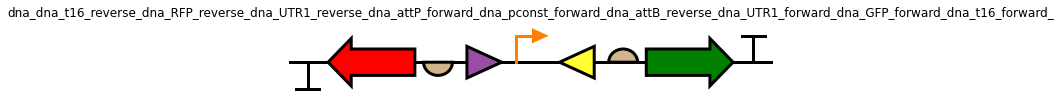

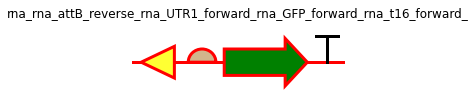

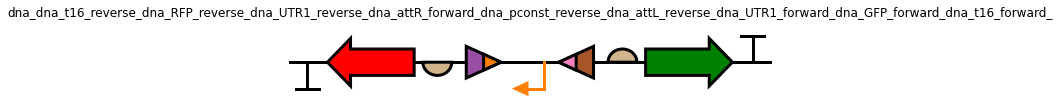

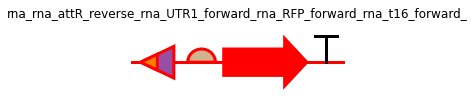

In [4]:

diffatt = IntegraseSite("attL","attL",integrase="phic31")

construct_1 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[attP,"forward"],[pconst,"forward"],[attB,"reverse"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])

components = [construct_1]
bxb1 = Integrase_Enumerator("Bxb1", int_mechanisms={"Bxb1":IntegraseRule("Bxb1")})

myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components,global_component_enumerators=[bxb1])


#now, we are using dnaplotlib to plot the constructs
enumerated_constructs = myMixture.global_component_enumeration(recursion_depth=4)

if(dpl_enabled):
    connames = ["normal","flipped"]
    conind = 0
    for construct in enumerated_constructs:
        if(isinstance(construct,DNA_construct)):

            plotConstruct(construct,debug=False,plot_rnas=True,outfig=connames[conind]+"_int_construct.svg")
            conind+=1
    #plotConstruct(construct_1,debug=False,plot_rnas=True,plot_dna_test=False)
    #plotConstruct(construct_2,debug=False,plot_rnas=True,plot_dna_test=False)
myCRN = myMixture.compile_crn()
myCRN.name="integrase_flip_test"
#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}


print("done")

In [5]:
plotNetwork(myCRN,colordict=colordict,iterations=2000,rseed=15,posscale=.3,export=True)

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\plotting\graph.py:120: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "
